In [20]:
import os
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

In [21]:
A = np.eye(5)
A

array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.]])

In [22]:
list_of_data = []
with open('ex1/ex1data1.txt' , 'r') as file:
    list_of_data.append(file.readlines())

In [23]:
X = []
y = []
for i in range(0,97):
    X.append(float(list_of_data[0][i].split(',')[0]))
    y.append(float(list_of_data[0][i].split(',')[1].strip()))

In [24]:
y = np.array(y)
X = np.array(X)

In [25]:
m = y.size
print('size of the data is {}.'.format(m))

size of the data is 97.


In [26]:
data = pd.DataFrame()
data['Population'] = X
data['Profit'] = y

In [27]:
data.head()

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [28]:
data.describe()

,Population,Profit
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Population  97 non-null     float64
 1   Profit      97 non-null     float64
dtypes: float64(2)
memory usage: 1.6 KB


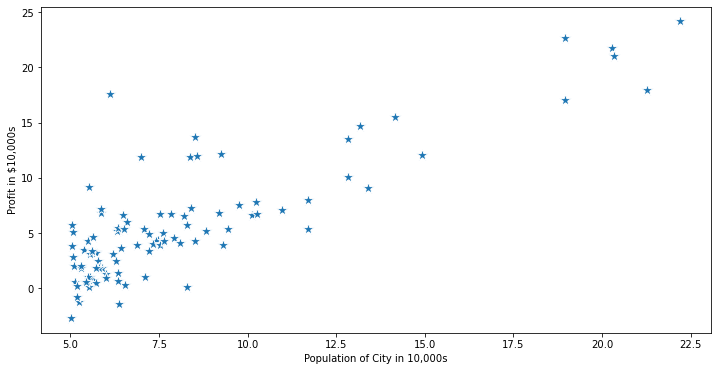

In [30]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x = data['Population'] , y = data['Profit'] , marker = '*' , s = 150 )
plt.xlabel("Population of City in 10,000s")
plt.ylabel("Profit in $10,000s")
plt.show()


In [31]:
def cost_func(X , y , theta):
    counts_of_data = y.size
    J = 0
    h = np.dot(X , theta)
    J = ( 1 / (2 * counts_of_data) * np.sum(np.square(h - y)))
    return J

In [33]:
counts_of_data = X.size
X = np.stack([np.ones(counts_of_data), X], axis=1)
print('Shape of X is: {}'.format(X.shape))

Shape of X is: (97, 2)


In [34]:
print('the cost that calculated with this thetas {} is {:.4f}'.format(np.array([-2, 0]) , cost_func(X, y, theta= np.array([-2.0, 0.0]))))

the cost that calculated with this thetas [-2  0] is 45.7510


In [35]:
def grad_dec(X , y , theta , alpha , iteration ):
    
    m = y.size
    
    theta = theta.copy()
    
    new_J = []
    new_theta = []
    
    for i in range(iteration):
        
        theta = theta - ( alpha / m ) * ( np.dot( X , theta ) - y ).dot( X )
        
        new_theta.append(theta)
        
        J = cost_func(X , y , theta)
        new_J.append(J)
        
    
    minimized_J = min(new_J)
    
    index_of_thetas = new_J.index(minimized_J)
    
    best_thetas = new_theta[index_of_thetas]
    
    return minimized_J , best_thetas , new_J

In [36]:
theta = np.zeros(2)
alpha = 0.02
iteration = 1600

In [37]:
best_J_cost , best_thetas , new_J = grad_dec(X , y , theta , alpha , iteration)

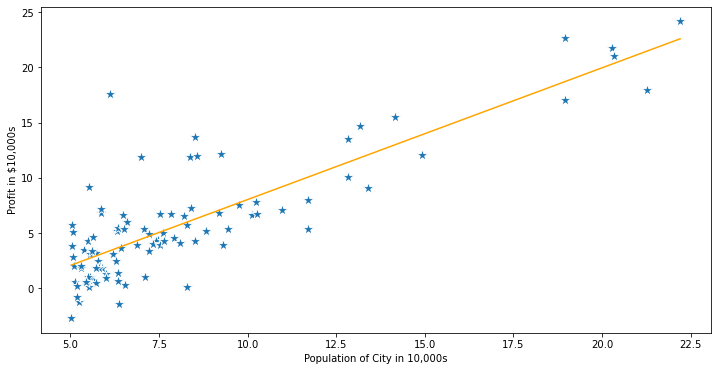

In [38]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x = data['Population'] , y = data['Profit'] , marker = '*' , s = 150 )
sns.lineplot( x = X[:,1] , y = np.dot(X , best_thetas) , color = 'orange')
plt.xlabel("Population of City in 10,000s")
plt.ylabel("Profit in $10,000s")
plt.show()

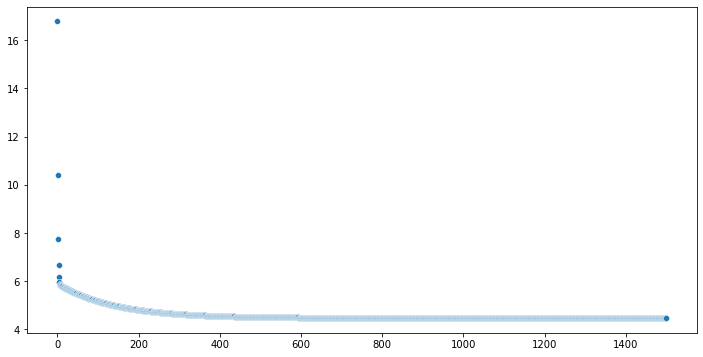

In [39]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x = range(1500),y = new_J[:1500])
plt.show()